In [ ]:
#lab4: một sô thuật toán cơ banrt của học máy

1. linear regerssion

- biết : hồi quy tuyến tính là dự đoán giá trị liên tục dựa trên một hoặc nhiều biến độc lập 

In [2]:
#sử dụng hồi quy tuyến tính để dự đoán giá nhà thông qua bộ dữ liệu
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
cali = fetch_california_housing()
x = pd.DataFrame(cali.data, columns=cali.feature_names)
y = pd.Series(cali.target)

In [4]:
# chia tập dữ liệu thành 2 phần: train và test  với tỉ lệ 80% và 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
#xây dựng và huấn luyện mô hình 
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [6]:
#dự đoán và đánh giá 
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 0.555891598695244
R2 Score: 0.5757877060324511


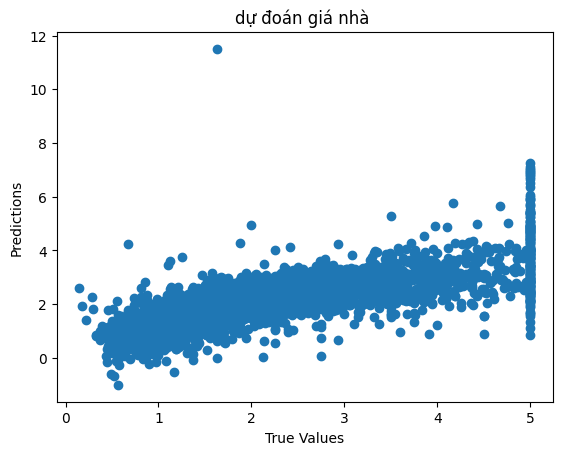

In [7]:
# vẽ biểu đồ 
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('dự đoán giá nhà ')
plt.show()  

In [11]:
#baitap2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("lab1data1.txt", header=None)
df

,0,1
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [12]:
#tách biến dữ liệu
X = pd.DataFrame(df[0])
y = pd.DataFrame(df[1])
# Chia tập dữ liệu thành 80% train và 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Train model for the second dataset
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}')
print(f'R^2: {r2:.2f}')

MSE: 15.71
R^2: 0.50


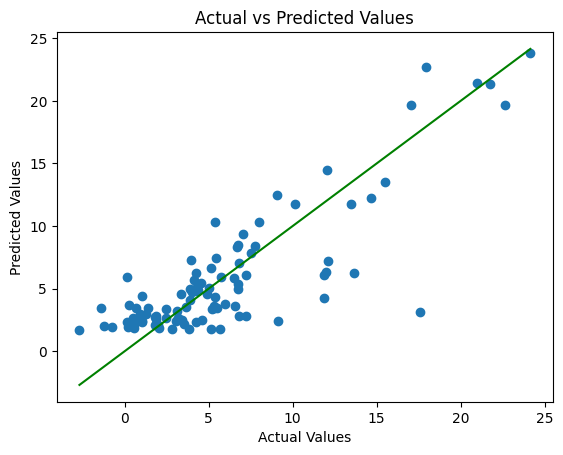

In [18]:
# vẽ biểu đồ 
y_all_pred = model.predict(X)
plt.scatter(y, y_all_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='green')
plt.axis('tight') 
plt.show()

###hồi quy logicstis
phân loại nhị phân hoặc đa lớp dựa trên các đặc trung


In [28]:
#xây dựng mô hình LG để phân loại nhị phân trong dữ liệu breast cancer
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

#load dữ liệu
data= load_breast_cancer()
x = data.data
y = data.target




In [20]:
#chia tập dữ liệu thành 75% train và 25% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [21]:
#xây dựng và huấn luyện mô hình
model = LogisticRegression()
model.fit(x_train, y_train)

c:\Users\lanan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
# Dự đoán và đánh giá
print('Train accuracy score: ', model.score(x_train, y_train))
print('Test accuracy score: ', model.score(x_test, y_test))
y_pred = model.predict(x_test)
score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred)
print(f'Score: {score} Recall: {recall}, Precision: {precision}, F1: {f1}')

Train accuracy score:  0.9389671361502347
Test accuracy score:  0.972027972027972
Score: 0.972027972027972 Recall: 0.9666042446941323, Precision: 0.9739010989010989, F1: 0.9777777777777777


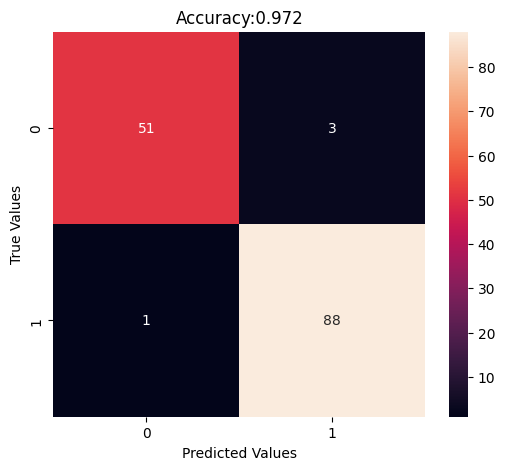

In [23]:
cm = confusion_matrix(y_test, model.predict(x_test))
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Accuracy:{0:.3f}'.format(score))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [24]:
#phân cụm nhóm đối tượng tương đồng mà không cần nhãn 

In [25]:
#sử dụng data isis để phân cụm 
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [26]:
iris = datasets.load_iris()
X = iris.data #có 4 đặc trưng
y = iris.target #nhãn để so sánh



In [29]:
# Áp dụng KMean với số cụm là 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_Kmeans = kmeans.predict(X)

In [30]:
# Sử dụng PCA để giảm chiều dữ liệu xuống còn 2 chiều
pca = PCA(n_components=2) # Giảm xuống còn 2 chiều
X_pca = pca.fit_transform(X)


giải thích: PCA là một phương pháp giảm chiều dữ liệu, giúp biến đổi tập dữ liệu có nhiều đặc trưng (features) thành một tập dữ liệu mới với số chiều nhỏ hơn nhưng vẫn giữ được tối đa thông tin quan trọng.\
Mục đích của PCA:

- Giảm chiều dữ liệu: Giảm số lượng đặc trưng nhưng vẫn bảo toàn phần lớn thông tin.
- Tối ưu hóa mô hình: Giảm thời gian huấn luyện và chi phí tính toán.
- Tránh overfitting: Giảm bớt các đặc trưng không quan trọng giúp mô hình tổng quát hơn.
- Trực quan hóa dữ liệu: Chuyển dữ liệu đa chiều thành 2D hoặc 3D để dễ quan sát hơn.


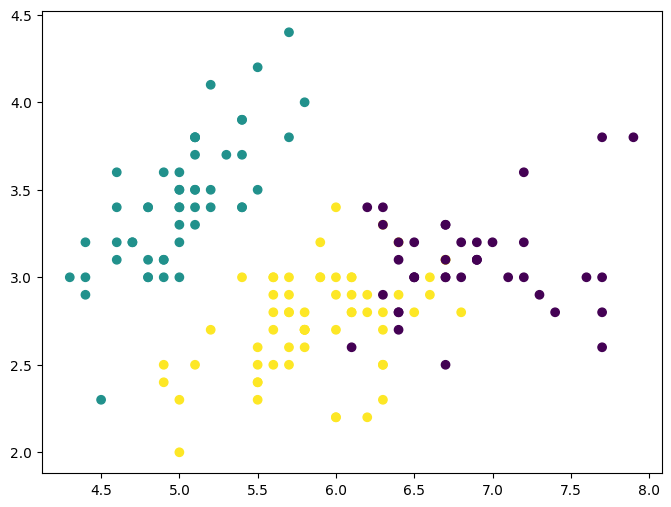

In [31]:
# Trực quan hóa kết quả
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1], c = y_Kmeans)
plt.show()

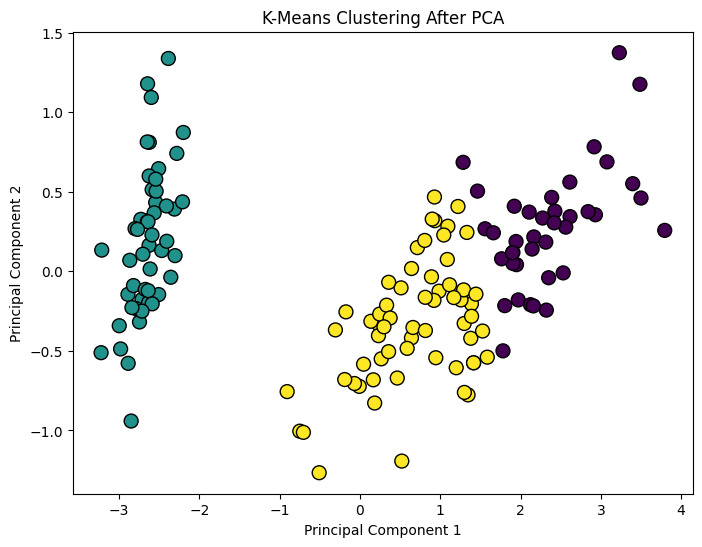

In [32]:
# Trực quan hóa kết quả sau khi áp dụng PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_Kmeans, cmap='viridis', edgecolors='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering After PCA')
plt.show()

In [33]:
# BTVN1 : cho tập dữ liệu dự đoán bệnh tim bằng hồi quy logictis
data = pd.read_csv("framingham.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [34]:
#kiểm tra dữ liệu trùng lặp 
data.duplicated().any()

np.False_

In [35]:
#kiểm tra dữ liệu bị thiếu
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [36]:
#loại bỏ các giá trị thiếu 
data = data.dropna()

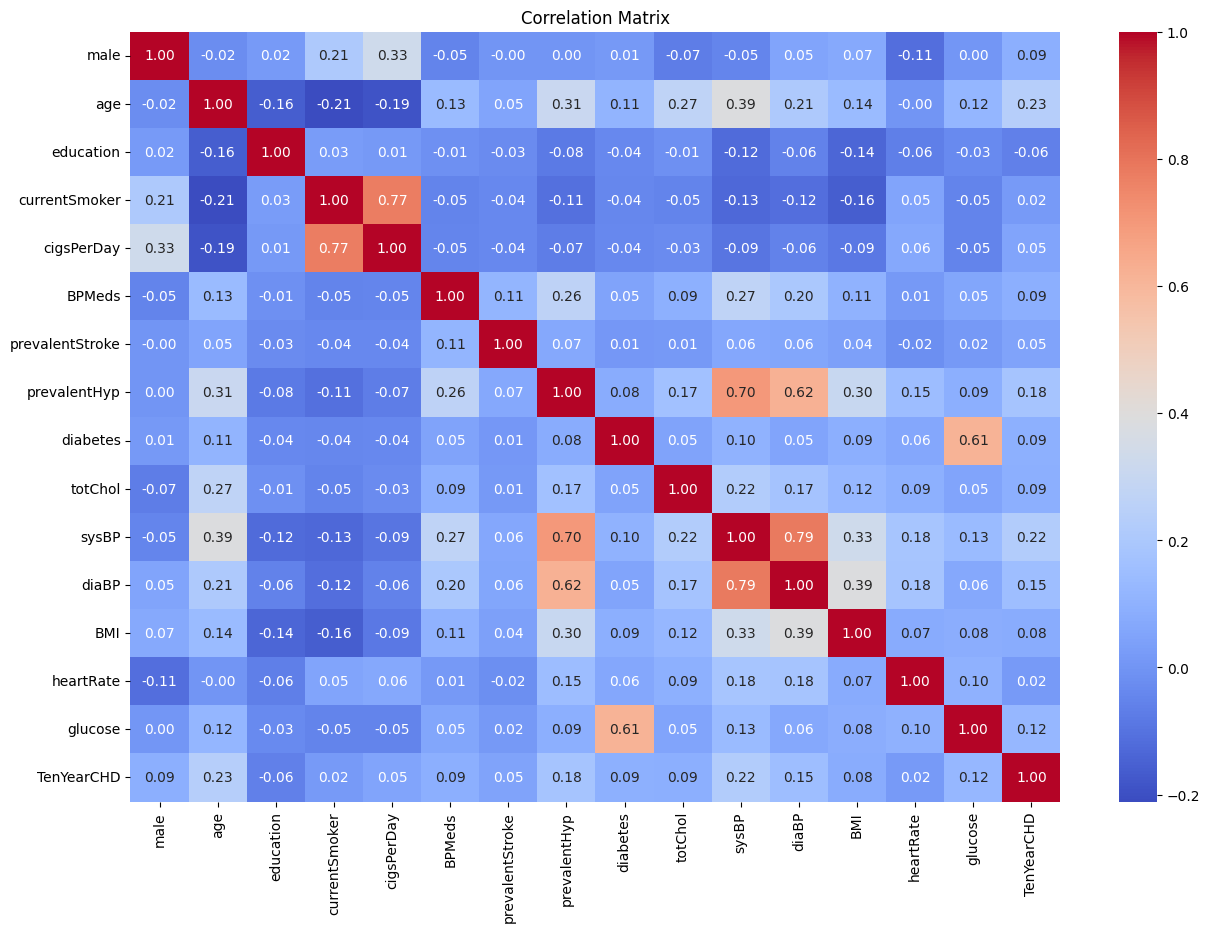

In [37]:
# tính toán ma trận tương quan và vẽ hearmap của ma trận tương quan
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [38]:
# Chia dữ liệu thành tập X và tập y
X = data.drop(columns=['TenYearCHD'])
y = data['TenYearCHD']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Xây dựng và huấn luyện mô hình
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\lanan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
# Dự đoán và đánh giá mô hình
print('Train accuracy score: ', model.score(X_train,y_train))
print('Test accuracy  score: ', model.score(X_test,y_test))

y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='macro')
recall = recall_score(y_test,y_pred,average='macro')
f1 = f1_score(y_test,y_pred)
print(f'Score: {score} Recall: {recall}, Precision: {precision}, F1: {f1}')

Train accuracy score:  0.8543091655266758
Test accuracy  score:  0.8346994535519126
Score: 0.8346994535519126 Recall: 0.5204918032786885, Precision: 0.6922834447106292, F1: 0.09022556390977443


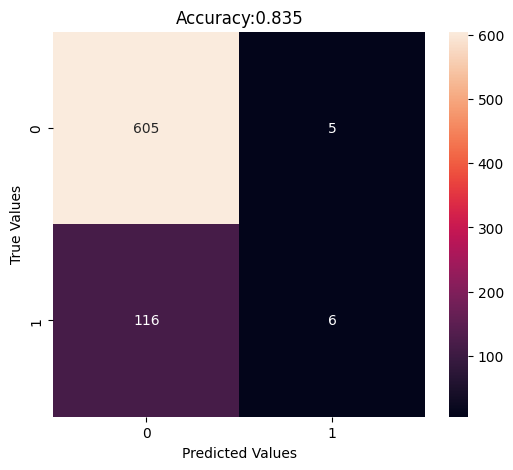

In [42]:
# Trực quan hóa dữ liệu
cm = confusion_matrix(y_test, model.predict(X_test))
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Accuracy:{0:.3f}'.format(score))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
#BTVN2 ứng dụng thuật toán kmean cho tập dữ liệu customer data, you can get in kaggle


In [43]:
# dọc file
data1 = pd.read_csv("Customers.csv")
data1.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [44]:
# xóa bỏ cuột customerID
data1.drop(["CustomerID"], axis = 1, inplace=True)

In [46]:
X = data1[['Annual Income ($)', 'Spending Score (1-100)']]

In [47]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_Kmeans = kmeans.predict(X)

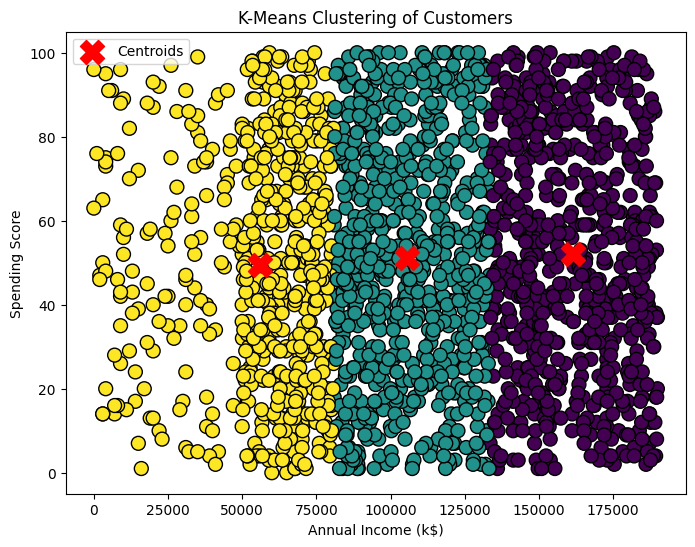

In [50]:
data1['Cluster'] = y_Kmeans

plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_Kmeans, cmap='viridis', edgecolors='k', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering of Customers')
plt.legend()
plt.show()

btvn3: tìm hiểu ma trận nhầm lẫn và đánh giá độ chính xác trên các bài tập lớn (khuyến nghị Precision, Recall, F1 score,...)

1. Ma Trận nhầm lẫn (Confusion Matrix) là gì:\
Ma trận nhấm lẫn là một phương pháp đánh giá kết quả của những bài toán phân loại với việc xem xét cả những chỉ số về độ chính xác và độ bao quát của các dự đoán cho từng lớp.
2. Cấu trúc cơ bản của ma trận nhầm lẫn\
Giả sử ta có hai lớp: Positive (Dương) và Negative (Âm). Ma trận nhầm lẫn sẽ có dạng:\
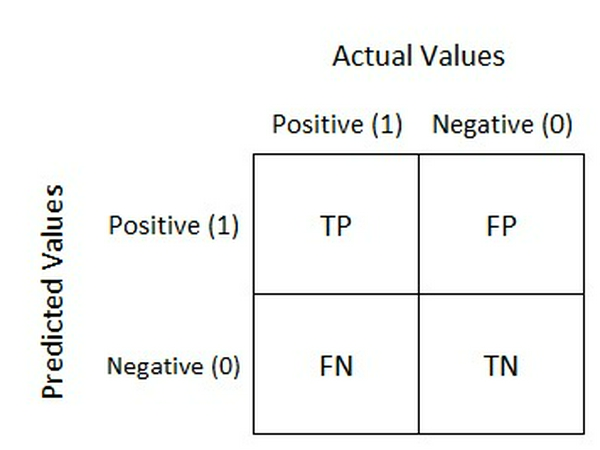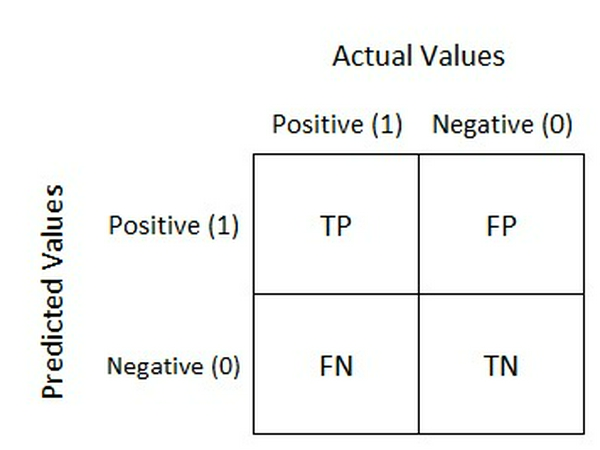\
TN (True Negative): Số lương dự đoán chính xác một cách gián tiếp\
FP (False Positive - Type 1 Error): Số lượng các dự đoán sai lệch\
FN (False Negative - Type 2 Error): Số lượng các dự đoán sai lệch một cách gián tiếp\
Precision: Trong tất cả các dự đoán Positive được đưa ra, bao nhiêu dự đoán là chính xác? Chỉ số này được tính theo công thức:\
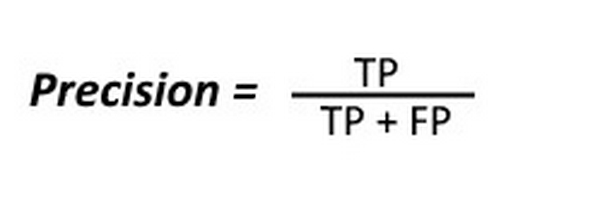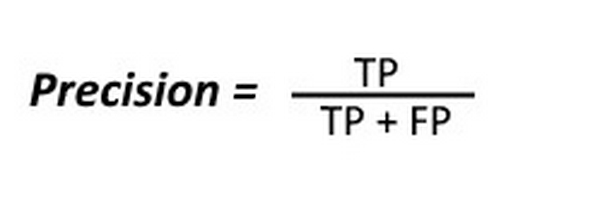\
Recall: Trong tất cả các trường hợp Positive, bao nhiêu trường hợp đã được dự đoán chính xác? Chỉ số này được tính theo công thức:\
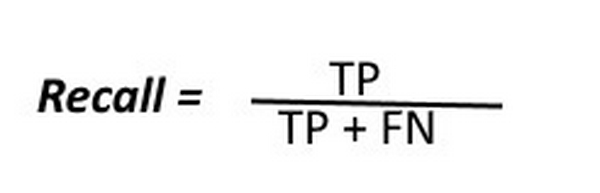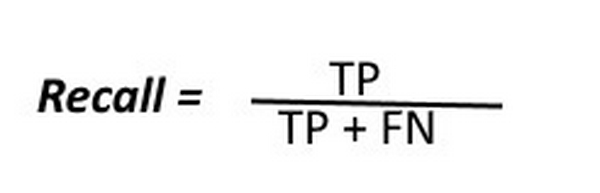\
F1 Score là trung bình điều hòa giữa precision và recall. Do đó nó đại diện hơn trong việc đánh gía độ chính xác trên đồng thời precision và recall.\
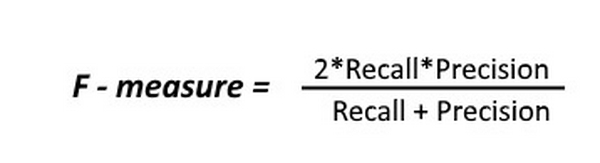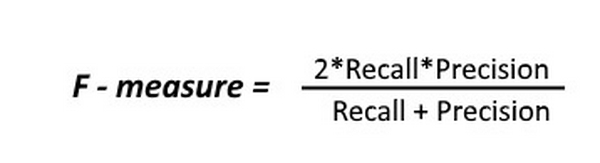\
Một mô hình có chỉ số F-score cao chỉ khi cả 2 chỉ số Precision và Recall để cao. Một trong 2 chỉ số này thấp đều sẽ kéo điểm F-score xuống. Trường hợp xấu nhất khi 1 trong hai chỉ số Precison và Recall bằng 0 sẽ kéo điểm F-score về 0. Trường hợp tốt nhất khi cả điểm chỉ số đều đạt giá trị bằng 1, khi đó điểm F-score sẽ là 1. Qua việc sử dụng chỉ số F-score, ta đã có một thước đo đáng tin cậy về hiệu năng của mô hình trong các bài toán phân loại, đặc biệt khi dữ liệu về một lớp lớn hơn gấp nhiều lần so với dữ liệu về lớp còn lại
3. tầm quan trọng của ma trận nhầm lẫn trong bài toán phân loại\
Ma trận nhầm lẫn đóng vai trò quan trọng trong việc đánh giá hiệu suất của các mô hình phân loại vì nó cung cấp cái nhìn chi tiết về từng loại lỗi mà mô hình mắc phải. Không chỉ dừng lại ở độ chính xác, ma trận này cho phép tính toán các chỉ số như precision, recall và f1-score, giúp đánh giá mô hình toàn diện hơn, đặc biệt trong các bài toán có dữ liệu mất cân bằng. Ngoài ra, ma trận nhầm lẫn còn là cơ sở để tối ưu hóa mô hình bằng cách điều chỉnh ngưỡng dự đoán, giảm thiểu các lỗi nghiêm trọng. Vì vậy, sử dụng ma trận nhầm lẫn là một bước quan trọng để đảm bảo độ tin cậy và tính chính xác của mô hình trong thực tế.

